In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
from matplotlib.transforms import offset_copy
from matplotlib.offsetbox import AnchoredText

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('colorbar', fontsize=12)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Obs data

In [4]:
ascos_ccn = pd.read_csv("../data/obs/ASCOS/ascos_aerosol_N.csv", index_col=0, parse_dates=True)
ascos_rad = xr.open_dataset("../data/obs/ASCOS/ascos_mmcrmerge.C1.c1.20080831.000000.nc")
ascos_snd = pd.read_csv('../data/obs/ASCOS/Radiosonde_2008_08_31_0535.csv')
ascos_rad['nheights'] = ascos_rad['height']

In [5]:
ascos_snd

,Height,Pressure,Time,Long,Lat,TempC,ThetaC,ThetaE,Rhl,Rhi,SpecHum,DewPt,Wspeed,Wdir,U,V
0,16.0,1026.3000,0.153846,-9.67,87.19,-3.350000,-5.343552,2.109199,94.000000,97.065244,2.731746,-4.174841,3.353714,23.736984,-1.350000,-3.070000
1,20.0,1025.7667,0.769231,-9.67,87.19,-3.383333,-5.336872,2.102197,94.000000,97.096790,2.726348,-4.207940,3.457355,23.524997,-1.380000,-3.170000
2,25.0,1025.1000,1.538461,-9.67,87.19,-3.425000,-5.328498,2.093500,94.000000,97.136236,2.719613,-4.249314,3.586967,23.277243,-1.417500,-3.295000
3,30.0,1024.4400,2.333333,-9.67,87.19,-3.470000,-5.323906,2.091476,94.166667,97.351159,2.717006,-4.270487,3.723337,23.053109,-1.458000,-3.426000
4,35.0,1023.7900,3.166667,-9.67,87.19,-3.520000,-5.325004,2.034111,93.700000,96.915935,2.695129,-4.386040,3.869802,22.854482,-1.503000,-3.566000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,23600.0,32.8000,5088.800000,-6.32,86.76,-47.850000,324.924140,324.871640,4.000000,6.370507,0.062406,-72.448744,3.252676,331.005280,1.576667,-2.845000
754,23700.0,32.3000,5108.600000,-6.31,86.76,-47.908333,327.399030,327.348520,4.000000,6.374137,0.062963,-72.492942,1.643676,340.389160,0.551667,-1.548333
755,23800.0,31.8000,5128.181800,-6.31,86.76,-47.727778,330.565190,330.530980,4.000000,6.363288,0.065257,-72.356150,0.980164,347.428920,0.213333,-0.956667
756,23900.0,31.3000,5148.181800,-6.31,86.76,-47.611538,333.617490,333.596520,4.000000,6.356352,0.067167,-72.268103,2.358591,317.207170,1.602308,-1.730769


In [6]:
u,v = ascos_snd.U[::10], ascos_snd.V[::10]
walt = ascos_snd.Height[::10]

(0.0, 1500.0)

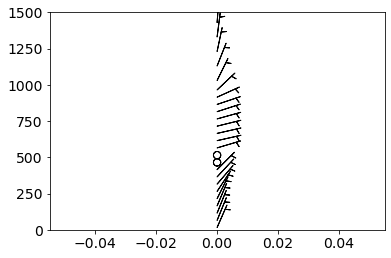

In [7]:
plt.barbs(np.zeros(len(walt)), walt, u ,v)
plt.ylim(0, 1500)

# Reanalysis data

In [8]:
class Location:
    def __init__(self, name, lat, lon):
        self.name = name
        self.lat = lat
        self.lon = lon


In [9]:
loc = Location('ASCOS', 87.19, -9.67)

In [10]:
centlat, centlon = loc.lat, loc.lon
lat1, lat2 = centlat - 40, 90
lon1, lon2 = centlon + 360 -50, centlon + 360 + 50

In [11]:
data_mslp = xr.open_dataset('../data/obs/ASCOS/e5.oper.an.sfc.128_151_msl.ll025sc.2008080100_2008083123.nc')
data_temp = xr.open_dataset('../data/obs/ASCOS/e5.oper.an.sfc.128_167_2t.ll025sc.2008080100_2008083123.nc')

In [12]:
# subset = dict(latitude=slice(lat2, lat1), longitude=slice(lon1, lon2), time=np.datetime64('2017-05-12T09:00:00'))
subset = dict(time=np.datetime64('2008-08-31T06:00:00'))


In [13]:
mslp = data_mslp.MSL.sel(**subset)/ 100
temp = data_temp.VAR_2T.sel(**subset) 

In [14]:
plev = np.arange(700, 1100, 4)

In [15]:
stime = pd.to_datetime(mslp.time.values).strftime('%Y-%m-%d %Hz')

# Plot 

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

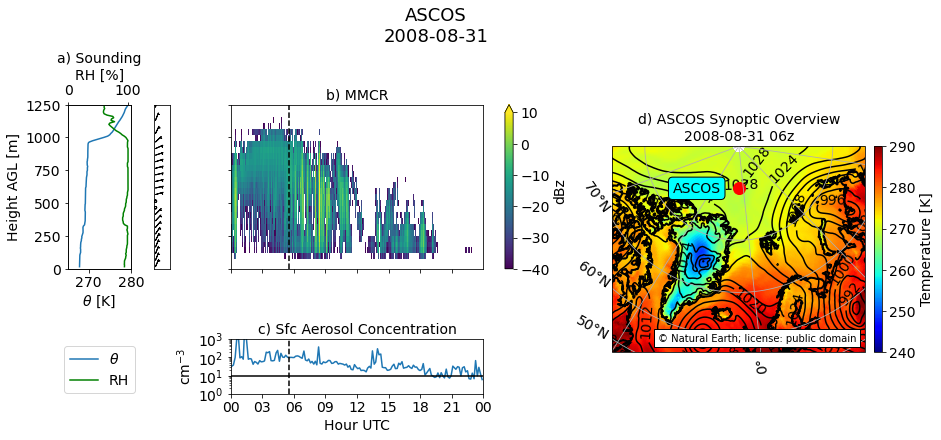

In [29]:
fig = plt.figure(constrained_layout=True, figsize=(12,6))

t1 = np.datetime64("2008-08-31T00:00:00")
t2 = np.datetime64("2008-09-01T00:00:00")
snd_time = np.datetime64('2008-08-31T05:35:00')

gs = GridSpec(2, 4, figure=fig, height_ratios=[3,1], width_ratios=[1,0.25,4,4])

ax1 = fig.add_subplot(gs[0,0])
axl = fig.add_subplot(gs[1,0])
wind_ax = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,2])
ax4 = fig.add_subplot(gs[:,3], projection=ccrs.LambertConformal(central_latitude=centlat, central_longitude=centlon))

theta = pd.to_numeric(ascos_snd.ThetaC[0:-2] + 273.15)
alt = pd.to_numeric(ascos_snd.Height[0:-2])

p1 = ax1.plot(theta, alt, label='$\\theta$')
# p3 = ax1.plot(ascos_model_theta, ascos_model_heights, color='C0', linestyle='dashed')

ax1.set_ylim(0, 1250)
ax1.set_xlim(265, 280)
ax1.set_xlabel("$\\theta$ [K]")
ax1.set_ylabel('Height AGL [m]')
ax1.set_title("a) Sounding")

plt.draw()

# wind barbs
# divider = make_axes_locatable(ax1)
# wind_ax = divider.new_horizontal(size='10%', pad=2)
wind_ax.sharey(ax1)
wind_ax.get_xaxis().set_visible(False)
wind_ax.get_yaxis().set_visible(False)
fig.add_axes(wind_ax)
wind_ax.barbs(np.zeros(len(walt)), walt, u, v, length=4)
wind_ax.set_xlim(-0.5,4)

rh = pd.to_numeric(ascos_snd.Rhl[0:-2])

axrh = ax1.twiny()
p2 = axrh.plot(rh, alt, label='RH', color='g')
axrh.set_xlabel('RH [%]')
axrh.set_xticks([0,100])

lns = p1+p2
labs = [l.get_label() for l in lns]
axl.legend(lns, labs, loc='upper center')
axl.spines['top'].set_visible(False)
axl.spines['right'].set_visible(False)
axl.spines['bottom'].set_visible(False)
axl.spines['left'].set_visible(False)
axl.get_xaxis().set_ticks([])
axl.get_yaxis().set_ticks([])




(ascos_rad.Reflectivity/100).where(ascos_rad.Reflectivity/100 >= -40).plot.pcolormesh(
    x='time', y='nheights', ax=ax2, vmin=-40, vmax = 10, cbar_kwargs=dict(label='dBz'),
    add_labels=False
)
# rad = ax2.pcolormesh(ascos_rad.time, ascos_rad_z, ascos_rad.T, shading="auto", vmin=-60, vmax=10)
ax2.set_ylim(0, 1250)
ax2.set_title("b) MMCR")
# ax2.set_ylabel("Height [m]")
# ax2.set_xticklabels(ax2.get_xticks(), rotation=0, ha='center')
ax2.axvline(snd_time, color='k', linestyle='dashed')
# ax2.sharex(ax3)
ax2.set_xticklabels([""])
ax2.set_yticklabels([""])

# ax3.sharex(ax2)
ax3.plot(ascos_ccn.index, ascos_ccn.N)
ax3.set_yscale('log')
ax3.set_xlim(t1, t2)
ax3.set_ylim(1, 1e3)
ax3.axhline(10, color='k')
# ax3.set_yticks([10, 100,200])
ax3.set_title("c) Sfc Aerosol Concentration")
# # ax3.set_xticklabels(ax3.get_xticks(), rotation=45, ha="right")
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax3.set_xlabel("Hour UTC")
ax3.set_ylabel('cm$^{-3}$')
ax3.axvline(snd_time, color='k', linestyle='dashed')

# Synoptic plot
cartopy_transform = ccrs.PlateCarree()._as_mpl_transform(ax4)
text_transform = offset_copy(cartopy_transform, units='inches', x=-0.25, fig=fig)
ax4.set_extent((lon1, lon2, lat1, lat2))

t = ax4.pcolormesh(temp.longitude, temp.latitude, temp, transform=ccrs.PlateCarree(), cmap='jet', vmin=240, vmax=290)
p = ax4.contour(mslp.longitude, mslp.latitude, mslp, transform=ccrs.PlateCarree(), colors='k', levels=plev)

ax4.clabel(p, inline=True,zorder=1)

gl = ax4.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels=False
gl.right_labels=False

text_kwargs = dict(verticalalignment='center', horizontalalignment='right', transform=text_transform,
        bbox={
            'facecolor':'aqua',
            'alpha' : 1,
            'boxstyle' : 'round',
            'zorder':10
        }
)
ax4.plot(loc.lon, loc.lat, marker='o', color='red', markersize=12, transform=ccrs.PlateCarree())
ax4.text(loc.lon, loc.lat, loc.name, **text_kwargs)

ax4.coastlines(color='k', linewidth=2)

text = AnchoredText('© Natural Earth; license: public domain',
                    loc=4, prop={'size': 10}, frameon=True)
ax4.add_artist(text)


ax4.set_title(f"d) {loc.name} Synoptic Overview\n{stime}")
plt.suptitle("ASCOS\n2008-08-31")

plt.draw()
posn = ax4.get_position()
cbar_ax = fig.add_axes([0, 0, 0.1, 0.1])
cbar_ax.set_position([posn.x0 + posn.width + 0.01, posn.y0, 0.01, posn.height])

plt.colorbar(t, label='Temperature [K]', cax=cbar_ax)



# plt.tight_layout()

plt.savefig("fig03.png", facecolor="w", dpi=300)